In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#load train and test datasets in these variables
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train = X_train / 255

In [7]:
X_test = X_test / 255

In [8]:
#first image in data set
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

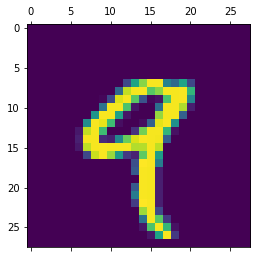

In [9]:
#showing first image in data set
plt.matshow(X_train[4])

In [10]:
y_train[4]

9

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
#originally, shape of X_train is (60000, 28, 28) and we wat to flatten it into (60000, 28*28)

In [13]:
#flatten training data set into single dimensional array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened.shape

(10000, 784)

In [15]:
#output: 10 neurons
#defin neural network
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

#compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

#since output is categorical, and y_train is integer numbers, hence sparse
# if y_train is one hot encoded, then loss function will be categorical crossentropy


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4709 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9260


In [16]:
#in here, accuracy is quite high but in the video example, it was low
# one of the reason is because the training set is not scaled. 
# since the value is from 0 to 255, we can scale it y divide it by 255

In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2695 - accuracy: 0.9246


[0.2694544792175293, 0.9246000051498413]

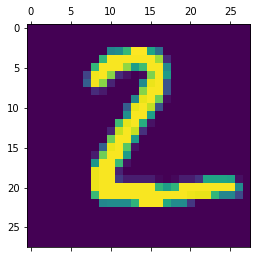

In [24]:
plt.matshow(X_test[1])

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 1ms/step


array([4.9103183e-01, 7.6145236e-03, 9.9938792e-01, 5.0067401e-01,
       4.0962073e-10, 8.1387579e-01, 8.9030254e-01, 1.3110394e-12,
       1.3954185e-01, 2.7333258e-09], dtype=float32)

In [26]:
np.argmax(y_predicted[1])

2

In [27]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [30]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  926,   19,    7,    2,   13,   10,   35,    5],
       [   2,    0,   19,  935,    0,   16,    2,   13,   16,    7],
       [   1,    2,    8,    2,  907,    0,    8,    8,    9,   37],
       [  11,    3,    3,   43,    7,  767,   17,    8,   26,    7],
       [  12,    3,    9,    1,    7,   12,  910,    2,    2,    0],
       [   1,    6,   22,    7,    5,    0,    0,  963,    1,   23],
       [  10,   11,    9,   26,    9,   31,   10,   16,  843,    9],
       [  11,    7,    1,   11,   19,    8,    0,   37,    2,  913]])>

Text(69.0, 0.5, 'Truth')

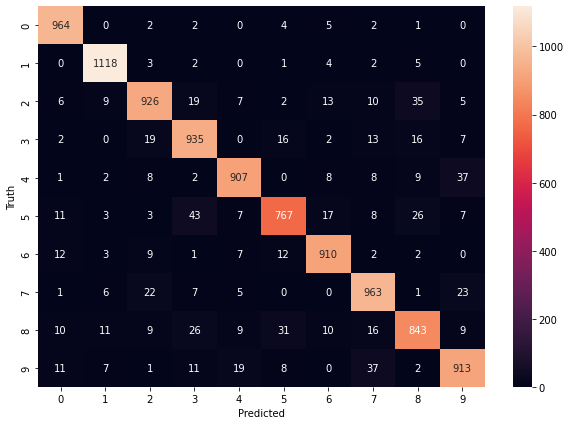

In [31]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
#add hidden layer: first layer has 100 neurons
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

#compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9252
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1206 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0518 - accuracy: 0.9842


In [35]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.9731


[0.08137660473585129, 0.9731000065803528]

Text(69.0, 0.5, 'Truth')

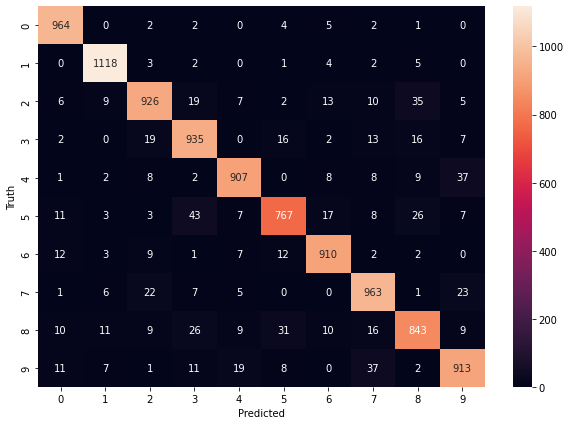

In [37]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

#compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2745 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1239 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0655 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0510 - accuracy: 0.9846
